<h1 style="font-size:3rem;color:black;"> 4105 Hw 2 </h1>

## Problem 1

In [11]:
import numpy as np
import pandas as pd
import nbconvert
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [12]:
#data set
data = pd.read_csv ('https://raw.githubusercontent.com/Owen3vans/4105_Hw2/main/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
x = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [14]:
y = data[['Outcome']]
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [15]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [16]:
xtrain.shape

(614, 8)

In [17]:
xtest.shape

(154, 8)

In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
xtrain

array([[-0.26225584, -1.024004  , -0.59688387, ..., -0.94853675,
        -0.61913663, -0.95742393],
       [ 0.93052258, -0.48624219, -3.65533398, ..., -4.1191127 ,
        -0.50807996, -0.79001447],
       [ 2.12330101,  0.46274924, -3.65533398, ...,  2.56722288,
         0.2897745 ,  0.54926114],
       ...,
       [ 0.63232798, -1.27706839,  0.5632179 , ...,  0.96915032,
        -0.88216557, -0.45519557],
       [-0.85864505, -0.2964439 ,  1.30146448, ...,  0.07422969,
        -0.62498171,  0.96778477],
       [ 0.93052258,  0.68418058, -0.49142007, ..., -0.43715353,
         0.60833178,  2.30706039]])

In [19]:
C=[10,1,.1,.01,.001]
for c in C:
    clf = LogisticRegression(C=c, solver ='liblinear')
    clf.fit(xtrain, ytrain)
    print('C:',c)
    print('Training accuracy:', clf.score(xtrain,ytrain))
    print('Test accuracy:' , clf.score(xtest,ytest))
    print('')


C: 10
Training accuracy: 0.7719869706840391
Test accuracy: 0.7857142857142857

C: 1
Training accuracy: 0.7752442996742671
Test accuracy: 0.7857142857142857

C: 0.1
Training accuracy: 0.7736156351791531
Test accuracy: 0.7922077922077922

C: 0.01
Training accuracy: 0.7687296416938111
Test accuracy: 0.7857142857142857

C: 0.001
Training accuracy: 0.742671009771987
Test accuracy: 0.7662337662337663



In [20]:

seed = 0
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=seed)
model = LogisticRegression(C=c,solver='liblinear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
matrix= confusion_matrix(ytest,predict)
print(matrix)

[[96 11]
 [28 19]]


In [21]:
seed = 0
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=seed)
model = LogisticRegression(C=c,solver='liblinear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
repo = classification_report(ytest,predict)
print(repo)

              precision    recall  f1-score   support

           0       0.77      0.90      0.83       107
           1       0.63      0.40      0.49        47

    accuracy                           0.75       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.73      0.75      0.73       154



Text(0.5, 257.44, 'Predicted Label')

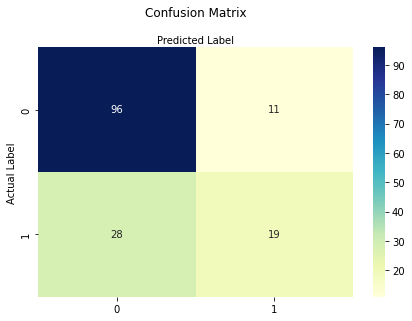

In [22]:
class_n=[0,1]
fig,ax= plt.subplots()
ticks= np.arange(len(class_n))
plt.xticks(ticks,class_n)
plt.yticks(ticks,class_n)

sns.heatmap(pd.DataFrame(matrix) ,annot=True , cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## Problem 2

In [25]:
N=[5,10]
for n in N:
    kfold = KFold(n_splits=n, random_state=0, shuffle=True)
    model= LogisticRegression(solver='liblinear')
    result= cross_val_score(model,x,y,cv=kfold)
    print('Acuracy:%.3f%% (%.3f%%)'%(result.mean()*100.0, result.std()*100))
    print('')

Acuracy:76.425% (3.278%)

Acuracy:76.818% (3.744%)



In [26]:
## Accuracy is higher with validation than without

## Problem 3.a

In [27]:
from sklearn.datasets import load_breast_cancer 
Data = load_breast_cancer()
x=Data.data
y=Data.target

In [28]:
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [29]:
y=pd.DataFrame(y)
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [31]:
xtrain.shape

(455, 30)

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [33]:
C=[10,1,.1,.01,.001]
for c in C:
    clf = LogisticRegression(C=c, solver ='liblinear')
    clf.fit(xtrain, ytrain)
    print('C:',c)
    print('Training accuracy:', clf.score(xtrain,ytrain))
    print('Test accuracy:' , clf.score(xtest,ytest))
    print('')

C: 10
Training accuracy: 0.9956043956043956
Test accuracy: 0.9385964912280702

C: 1
Training accuracy: 0.9956043956043956
Test accuracy: 0.9473684210526315

C: 0.1
Training accuracy: 0.9868131868131869
Test accuracy: 0.9473684210526315

C: 0.01
Training accuracy: 0.9736263736263736
Test accuracy: 0.9473684210526315

C: 0.001
Training accuracy: 0.9582417582417583
Test accuracy: 0.9473684210526315



In [34]:
seed = 0
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=seed)
model = LogisticRegression(C=c,solver='liblinear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
matrix= confusion_matrix(ytest,predict)
print(matrix)

[[42  5]
 [ 2 65]]


In [35]:
seed = 0
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=seed)
model = LogisticRegression(C=c,solver='liblinear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
repo = classification_report(ytest,predict)
print(repo)

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        47
           1       0.93      0.97      0.95        67

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.94       114
weighted avg       0.94      0.94      0.94       114



Text(0.5, 257.44, 'Predicted Label')

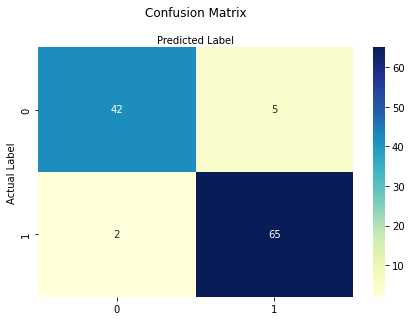

In [36]:
class_n=[0,1]
fig,ax= plt.subplots()
ticks= np.arange(len(class_n))
plt.xticks(ticks,class_n)
plt.yticks(ticks,class_n)

sns.heatmap(pd.DataFrame(matrix) ,annot=True , cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

## Problem 3.b

In [37]:
from sklearn.datasets import load_breast_cancer 
Data = load_breast_cancer()
x=Data.data
y=Data.target

In [52]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [53]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)

In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [55]:
C=[10,1,.1,.01,.001]
for c in C:
    clf = LogisticRegression(penalty='l1',C=c, solver ='liblinear')
    clf.fit(xtrain, ytrain)
    print('C:',c)
    print('Training accuracy:', clf.score(xtrain,ytrain))
    print('Test accuracy:' , clf.score(xtest,ytest))
    print('')

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.9649122807017544

C: 1
Training accuracy: 0.989010989010989
Test accuracy: 0.9736842105263158

C: 0.1
Training accuracy: 0.978021978021978
Test accuracy: 0.9912280701754386

C: 0.01
Training accuracy: 0.9274725274725275
Test accuracy: 0.9736842105263158

C: 0.001
Training accuracy: 0.37362637362637363
Test accuracy: 0.3684210526315789



In [56]:
seed = 0
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state=seed)
model = LogisticRegression(penalty='l1',C=c, solver='liblinear')
model.fit(xtrain,ytrain)
predict=model.predict(xtest)
repo = classification_report(ytest,predict)
print(repo)

              precision    recall  f1-score   support

           0       1.00      0.79      0.88        47
           1       0.87      1.00      0.93        67

    accuracy                           0.91       114
   macro avg       0.94      0.89      0.91       114
weighted avg       0.92      0.91      0.91       114



Text(0.5, 257.44, 'Predicted Label')

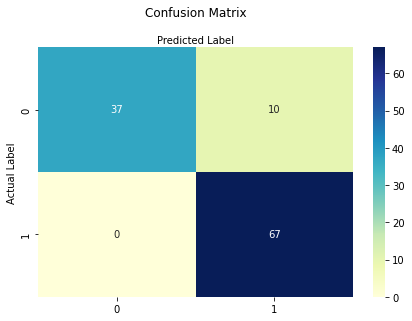

In [57]:
class_n=[0,1]
fig,ax= plt.subplots()
ticks= np.arange(len(class_n))
plt.xticks(ticks,class_n)
plt.yticks(ticks,class_n)

sns.heatmap(pd.DataFrame(matrix) ,annot=True , cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix',y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

In [58]:
# the weight penalty gave fewer FN but higher FP 

## Problem 4.a

In [ ]:
## validation without penalties

In [59]:
N=[5,10]
for n in N:
    kfold = KFold(n_splits=n, random_state=0, shuffle=True)
    model= LogisticRegression(solver='liblinear')
    result= cross_val_score(model,x,y,cv=kfold)
    print('Acuracy:%.3f%% (%.3f%%)'%(result.mean()*100.0, result.std()*100))
    print('')

Acuracy:95.434% (2.737%)

Acuracy:95.254% (3.849%)



## Problem 4.b

In [ ]:
## validation with penalties

In [60]:
N=[5,10]
for n in N:
    kfold = KFold(n_splits=n, random_state=0, shuffle=True)
    model= LogisticRegression(penalty='l1',solver='liblinear')
    result= cross_val_score(model,x,y,cv=kfold)
    print('Acuracy:%.3f%% (%.3f%%)'%(result.mean()*100.0, result.std()*100))
    print('')

Acuracy:95.609% (2.658%)

Acuracy:95.078% (3.664%)



In [ ]:
#less accurate than with just validation